# ObsID : 0945020133, SRCNUM : 3, Instru : EMOS2
**Simbad :** Seyfert 1 Galaxy (2XMM J033204.0-273726) https://simbad.cds.unistra.fr/simbad/sim-id?Ident=%40645704&Name=2XMM%20J033204.0-273726&submit=submit

In [1]:
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import numpy as np

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

plt.rcParams['figure.figsize'] = [12,7]

Fit.statMethod = "cstat"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.
Parameter delta values for fits will now be 0.0001 * parValue


## Load files

In [6]:
spec = Spectrum(glob.glob('ObsID*_SRCNUM*_E*_spectrum_grp_cstat.fits')[0])


2 spectra  in use
 
Spectral Data File: ObsID0945020133_SRCNUM3_EMOS2_spectrum_grp_cstat.fits  Spectrum 2
Net count rate (cts/s) for Spectrum:2  4.408e-03 +/- 7.987e-04 (49.8 % total)
 Assigned to Data Group 1 and Plot Group 2
  Noticed Channels:  1-124
  Telescope: XMM Instrument: EMOS2  Channel Type: PI
  Exposure Time: 1.56e+04 sec
 Using fit statistic: cstat
 Using Background File                MOSbackground_spectrum.fits
  Background Exposure Time: 1.56e+04 sec
 Using Response (RMF) File            MOS.rmf for Source 1
 Using Auxiliary Response (ARF) File  MOS.arf



In [3]:
print(f"Number of counts : {1.56e+04*4.408e-03}")

Number of counts : 68.7648


The low number of counts indicates that we should use cstat instead of chi statistics.

## Plot spectrum

In [7]:
Plot.xAxis="keV"
Plot.device = "/xs"
Plot.xLog=True
Plot.yLog=True
#Plot.addCommand("Rescale Y 0.00001 0.005")
Plot("data")
spec.ignore("**-0.2 12-**")

     7 channels (1-7) ignored in spectrum #     2
   113 channels (12,124) ignored in spectrum #     2



(-0.5, 859.5, 664.5, -0.5)

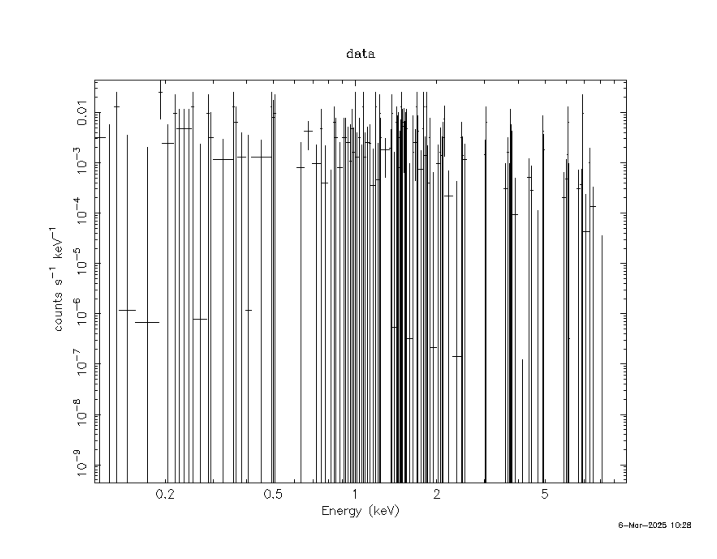

In [4]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum2.png')[0])
plt.imshow(img)
plt.axis('off')

### Black body model

In [8]:
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
plt.show()


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.

Fit statistic  : C-Statistic              8.754574e+06     using 124 bins, sp

(-0.5, 857.5, 660.5, -0.5)

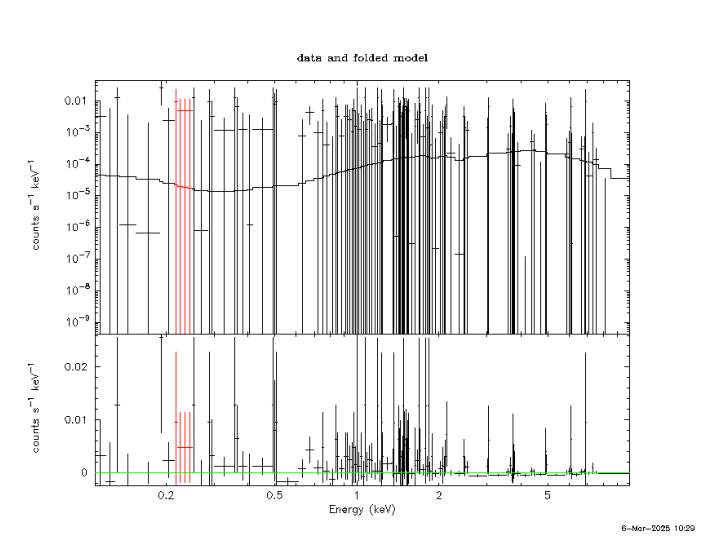

In [9]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_bbody2.png')[0])
plt.imshow(img)
plt.axis('off')

### Bremsstrahlung model

In [10]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic              2.185786e+06     using 124 bins, spectrum 1.
                 C-Statistic                1382.491     using 4 bins, spectrum 2.
Total fit statistic                       2.187168e+06     with 125 d.o.f.

Test statistic : Chi-Squared              2.697840e+10     using 128 bins.
 Null hypothesis probability of 0.000000e+00 with 125 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
C-Statistic  |beta|/N    Lvl          1:nH          2:kT        3:norm
81362.4      408372       -3      0.1189

(-0.5, 857.5, 661.5, -0.5)

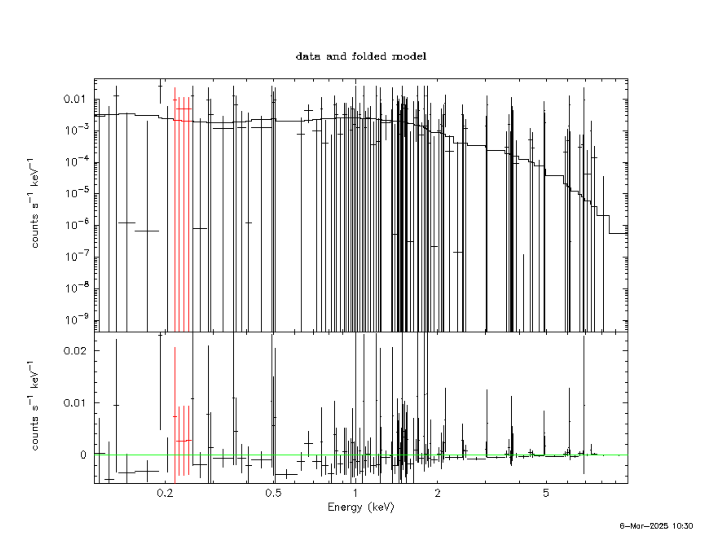

In [11]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_bremss2.png')[0])
plt.imshow(img)
plt.axis('off')

### Apec model

In [12]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : C-Statistic                825714.2     using 124 bins, spectrum 1.
                 C-Statistic                654.2664     using 4 bins, spectrum 2.
Total fit statistic                         826368.5     with 125 d.o.f.

Test statistic : Chi-Squared              2.971013e+09     using 128 bins.
 Null hypothesis probability of 0.000000e+00 with 125 degrees of freedom
 Current data and model not fit yet.
       

(-0.5, 856.5, 660.5, -0.5)

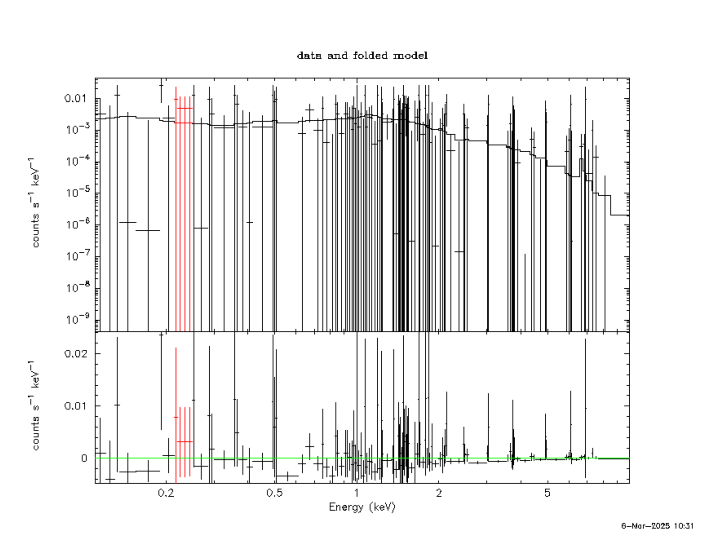

In [13]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_apec2.png')[0])
plt.imshow(img)
plt.axis('off')

### Powerlaw model

In [14]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic              5.217176e+06     using 124 bins, spectrum 1.
                 C-Statistic                2880.262     using 4 bins, spectrum 2.
Total fit statistic                       5.220057e+06     with 125 d.o.f.

Test statistic : Chi-Squared              1.675527e+11     using 128 bins.
 Null hypothesis probability of 0.000000e+00 with 125 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
C-Statistic  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
2.49471e+06  1.30679e+06  -2      0.30

(-0.5, 856.5, 661.5, -0.5)

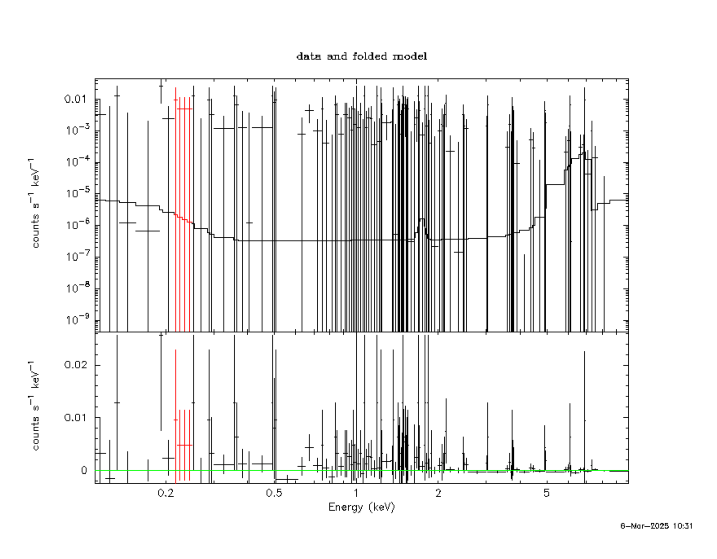

In [16]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_powerlaw2.png')[0])
plt.imshow(img)
plt.axis('off')

### ESASky
On ESASky, the pointer for GLADE is slightly off the source, but no other sources seem to correspond to it in any wavelength. https://sky.esa.int/esasky/?target=53.01683333333333%20-27.62344444444444&hips=XMM-Newton+EPIC+color&fov=1&projection=SIN&cooframe=J2000&sci=true&lang=fr

``EPIC Stack``

- Stack Catalogue name : 4XMMs J033204.0-2737254XMM J033204.0-273725
- RA : 03h 32m 04.042s
- DEC : -27° 37' 25.23"

``GLADE``

- No : 1 697 6000
- RA : 3h 32m 04.416s
- DEC : -27° 37' 39.40"
- Distance : 7173.0551 Mpc

## Flux

In [17]:
AllModels.calcFlux(".2 12.0")

Spectrum Number: 1, 2
Data Group Number: 1
 Model Flux 1.0573e-05 photons (1.4543e-13 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [18]:
Flux = 1.4543e-13 # ergs/cm^2/s

## Column density nH
### 3DNH-tool
http://astro.uni-tuebingen.de/nh3d/nhtool

**Sky coordinates (°) :** from ESASky

- RA = 53.0168404°
- Dec = -27.6236739°

53.02 -27.62

**Column density :** nH = 4*10^20 cm^-2

The different models give a column density of :

- bbody : nH = 8.50112*10^7
- bremss : nH = 6.31534*10^12
- apec : nH = 1.43992*10^5
- powerlaw : nH = 334.333*10^22

None of the values correspond to 3DNH-tool one.

### Luminosity

In [19]:
"""GLADE"""

d_kpc = 7173055.1 # Distance en kpc
d_cm = d_kpc*3.0857*10**21 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
Luminosity = 4*np.pi*Flux*(d_cm)**2 # erg/s

print(color.BOLD+"(GLADE)"+color.END)
print(f"Distance : {d_cm} cm")
print(f"Luminosité : {Luminosity} erg/s")

(GLADE)
Distance : 2.213389612207e+28 cm
Luminosité : 8.95322714875154e+44 erg/s
